In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


1. Data Preparation:

○ Access the StatsBomb Open Data repository..
○ Locate the FA Women's Super League dataset using competitions.json.
○ Extract player-level data from events/<match_id>.json and aggregate it into a dataset of
performance metrics relevant for scouting.

2. Talent Scouting Analysis or Modeling:

○ Develop a model or analysis to identify high-potential players for recruitment. Be
creative in your approach, choosing metrics and methods that align with scouting goals. If
modeling, split data into training and testing sets and evaluate with a suitable metric.
Deliver clear, actionable insights for recommending players.

3. Submission: Submit a Jupyter notebook as PDF or HTML (how to linked below) and relevant
source code files containing:

○ Code to load and process the StatsBomb FA Women's Super League data into a
player-level dataset for scouting.

○ Your model or analysis, including visualizations or results that identify high-potential
players.

○ A brief explanation (100–200 words) addressing:
■ What player performance metrics did you choose, and why are they relevant for
scouting talent?
■ What insights did your model or analysis reveal about potential players for
recruitment?
■ What are the limitations of your approach?

4. Tools:

○ Use Python with libraries like pandas, scikit-learn, matplotlib, or seaborn.


In [36]:
df_18 =pd.read_parquet('/Users/amitmishra/wsl_data/data/df_18.parquet')

In [37]:
df_18.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,counterpress,dribble_nutmeg,dribble_outcome,...,shot_saved_off_target,goalkeeper_shot_saved_to_post,shot_saved_to_post,goalkeeper_lost_in_play,goalkeeper_success_out,shot_follows_dribble,goalkeeper_success_in_play,half_start_late_video_start,half_end_early_video_end,goalkeeper_saved_to_post
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [38]:
attacking_positions = [
    'Center Forward',
    'Left Center Forward', 
    'Right Center Forward',
    'Secondary Striker'
]

In [39]:
df_18 = df_18[(df_18['position'].isin(attacking_positions))]

In [40]:
# Aggregation step; adding KPIs to scout a striker

stats_18 = df_18.groupby(['player_id', 'player']).agg({
    'match_id': 'nunique', 
    'team': 'first',
    'shot_statsbomb_xg': 'sum',
    'shot_one_on_one': lambda x: (x == True).sum(),     # one-v-one situation (for strikers making off the ball runs, movement)
    'pass_through_ball': lambda x: (x == True).sum(),   # for through passess (progression capability)
    'pass_goal_assist': lambda x: (x == True).sum(),    # for assists
    'shot_outcome': lambda x: (x == 'Goal').sum(),      # for counting goals scored by each player
    'pass_shot_assist': lambda x: (x == True).sum(),    # for key passes (Link-up play)
    'counterpress':lambda x: (x==True).sum(),           # if the striker pressed (differentiator)
    'duel_outcome': lambda x: (x == 'Won').sum(),       # physical battles won (differentiator)
    'dribble_outcome': lambda x: (x=='Complete').sum()
})

In [41]:
stats_18 = stats_18.rename(columns={'shot_outcome': 'goals',
                   'shot_statsbomb_xg':'xG', 
                   'match_id':'mtchs_pld',
                   'duel_outcome':'duels_won',
                   'pass_through_ball':'through_balls',
                   'pass_goal_assist':'assists',
                   'dribble_outcome':'completed_dribbles',
                   'pass_shot_assist':'key_passes',
                   'shot_one_on_one':'1vs1'})

In [47]:
stats_18 = stats_18.reset_index()

In [48]:
stats_18.describe()

,player_id,mtchs_pld,xG,1vs1,through_balls,assists,goals,key_passes,counterpress,duels_won,completed_dribbles,xG_per90,1vs1_per90,through_balls_per90,assists_per90,goals_per90,key_passes_per90,counterpress_per90,duels_won_per90,completed_dribbles_per90
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,14690.853659,8.365854,2.363957,1.829268,1.512195,0.951220,2.243902,6.121951,37.024390,2.365854,8.707317,0.231024,0.176976,0.157766,0.099721,0.207239,0.670635,4.128209,0.286982,0.971991
std,5225.735051,4.391788,3.571813,2.999187,2.038651,1.856761,4.109626,5.793078,29.698895,2.395372,7.981992,0.221429,0.228281,0.194755,0.163390,0.285250,0.457844,1.663119,0.265190,0.653199
min,4641.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
25%,15555.000000,5.000000,0.358254,0.000000,0.000000,0.000000,0.000000,2.000000,17.000000,1.000000,3.000000,0.056274,0.000000,0.000000,0.000000,0.000000,0.250000,3.000000,0.111111,0.555556
50%,15623.000000,7.000000,1.121220,1.000000,1.000000,0.000000,1.000000,5.000000,28.000000,2.000000,6.000000,0.162109,0.125000,0.076923,0.000000,0.111111,0.750000,4.250000,0.250000,0.846154
75%,16400.000000,10.000000,2.229119,2.000000,2.000000,1.000000,2.000000,8.000000,46.000000,3.000000,11.000000,0.318720,0.250000,0.266667,0.125000,0.285714,0.857143,5.400000,0.375000,1.250000
max,23412.000000,20.000000,17.526108,13.000000,7.000000,10.000000,21.000000,26.000000,130.000000,11.000000,39.000000,0.949019,0.866667,0.625000,0.600000,1.050000,1.750000,8.200000,1.166667,3.000000


In [50]:
# filger out players who've played more than 3 games

stats_18 = stats_18[stats_18['mtchs_pld'] > 3]

In [51]:
stats_18.head()

,player_id,player,mtchs_pld,team,xG,1vs1,through_balls,assists,goals,key_passes,...,completed_dribbles,xG_per90,1vs1_per90,through_balls_per90,assists_per90,goals_per90,key_passes_per90,counterpress_per90,duels_won_per90,completed_dribbles_per90
0,4641.0,Francesca Kirby,12,Chelsea FCW,5.925652,2,1,0,4,21,...,17,0.493804,0.166667,0.083333,0.000000,0.333333,1.750000,3.000000,0.083333,1.416667
1,4643.0,Georgia Stanway,4,Manchester City WFC,1.533888,1,0,0,1,3,...,11,0.383472,0.250000,0.000000,0.000000,0.250000,0.750000,4.250000,0.250000,2.750000
2,4650.0,Nadia Nadim,4,Manchester City WFC,1.219117,0,0,0,0,3,...,5,0.304779,0.000000,0.000000,0.000000,0.000000,0.750000,5.500000,0.000000,1.250000
3,4653.0,Jane Ross,19,West Ham United LFC,6.622918,4,7,2,6,15,...,22,0.348575,0.210526,0.368421,0.105263,0.315789,0.789474,5.473684,0.263158,1.157895
4,4654.0,Nikita Parris,15,Manchester City WFC,14.235290,13,4,5,14,12,...,25,0.949019,0.866667,0.266667,0.333333,0.933333,0.800000,8.200000,0.266667,1.666667


In [45]:
# Convert everything to per-game rates

numeric_cols = stats_18.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop('mtchs_pld')

for col in numeric_cols:
    stats_18[f'{col}_per90'] = stats_18[col] / stats_18['mtchs_pld']


In [52]:
per_game_cols = ['xG_per90', '1vs1_per90', 'through_balls_per90', 'assists_per90', 
                 'goals_per90', 'key_passes_per90', 'counterpress_per90', 
                 'duels_won_per90', 'completed_dribbles_per90']

clustering_data = stats_18[per_game_cols]

### Clustering

In [71]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Run KMeans clustering

kmeans = KMeans(n_clusters=2, random_state=42)
stats_18['cluster'] = kmeans.fit_predict(scaled_data)



In [72]:
# check cluster distribution

print('')

print(f'{stats_18['cluster'].value_counts()}')


cluster
0    26
1    15
Name: count, dtype: int64


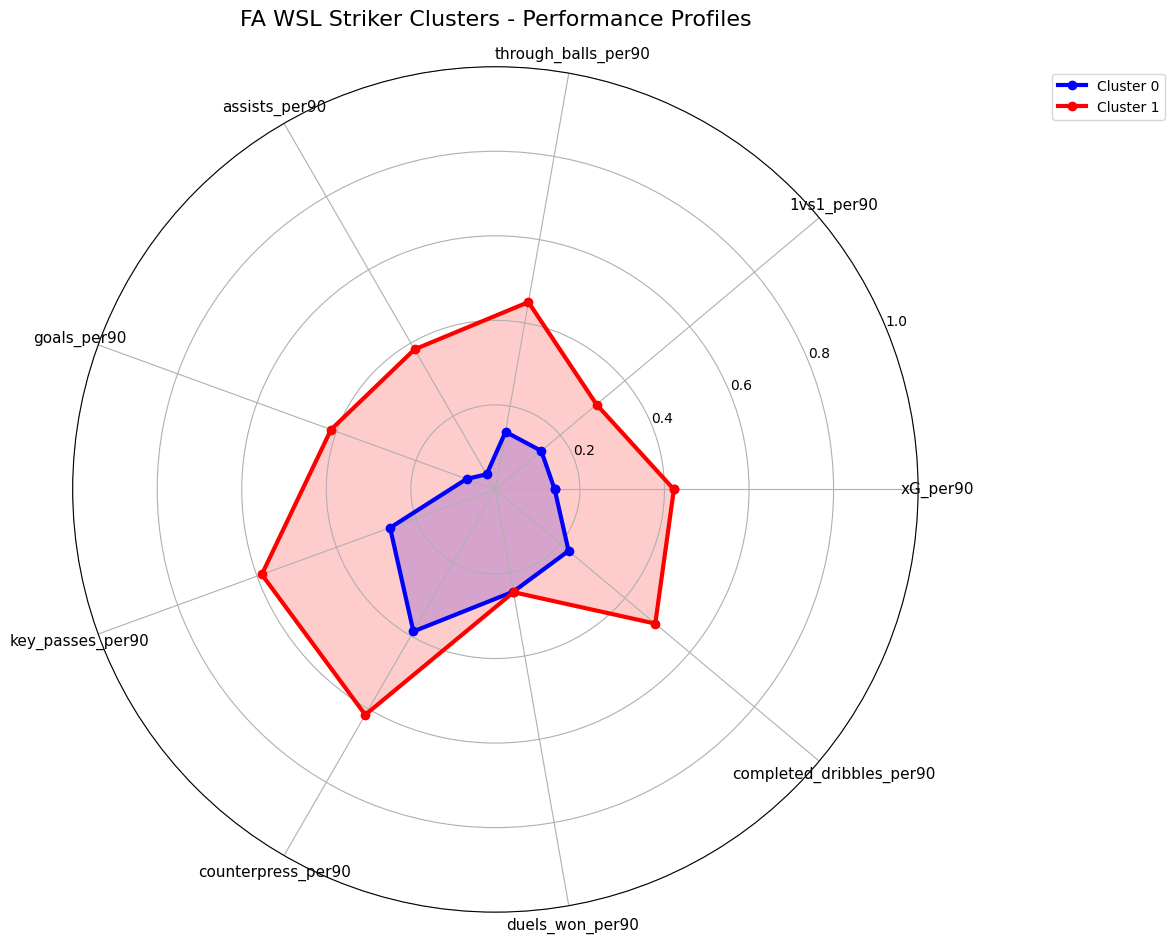


Cluster Characteristics (for naming):

Cluster 0:
Strongest areas: {'counterpress_per90': 3.4867678607214807, 'completed_dribbles_per90': 0.6782020173140082, 'key_passes_per90': 0.46386172274181325}

Cluster 1:
Strongest areas: {'counterpress_per90': 5.24004048582996, 'completed_dribbles_per90': 1.4812243214874796, 'key_passes_per90': 1.029041835357625}


In [79]:
# Calculate cluster means
cluster_means = stats_18.groupby('cluster')[per_game_cols].mean()

# Get ranges for scaling (min/max for each metric)
ranges = [(stats_18[col].min(), stats_18[col].max()) for col in per_game_cols]

def create_striker_radar(cluster_means, variables, ranges):
    # Calculate angles for each variable
    angles = np.linspace(0, 2*np.pi, len(variables), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
    
    # Colors and labels
    colors = ['blue', 'red']
    cluster_labels = ['Cluster 0', 'Cluster 1']  # You'll rename these based on analysis
    
    # Plot each cluster
    for i, cluster_id in enumerate([0, 1]):
        values = cluster_means.loc[cluster_id].values.tolist()
        
        # Scale values between 0 and 1 for better visualization
        scaled_values = [(val - ranges[j][0]) / (ranges[j][1] - ranges[j][0]) 
                        for j, val in enumerate(values)]
        scaled_values += scaled_values[:1]  # Close the loop
        
        ax.plot(angles, scaled_values, 'o-', linewidth=3, label=cluster_labels[i], color=colors[i])
        ax.fill(angles, scaled_values, alpha=0.2, color=colors[i])
    
    # Customize
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables, size=11)
    ax.set_ylim(0, 1)
    ax.set_title('FA WSL 2018 Striker Clusters - Performance Profiles', size=16, pad=30)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)
    
    return fig, ax

# Create the improved radar plot
fig, ax = create_striker_radar(cluster_means, per_game_cols, ranges)
plt.tight_layout()
plt.show()

# Print cluster characteristics for naming
print("\nCluster Characteristics (for naming):")
for cluster_id in [0, 1]:
    print(f"\nCluster {cluster_id}:")
    cluster_data = cluster_means.loc[cluster_id]
    # Show which metrics are highest for this cluster
    top_metrics = cluster_data.nlargest(3)
    print("Strongest areas:", top_metrics.to_dict())

In [85]:
elite_strikers = stats_18[stats_18['cluster'] == 1].drop(columns=['xG', '1vs1',
       'through_balls', 'assists', 'goals', 'key_passes', 'counterpress',
       'duels_won', 'completed_dribbles'])

In [86]:
elite_strikers.head()

,player_id,player,mtchs_pld,team,xG_per90,1vs1_per90,through_balls_per90,assists_per90,goals_per90,key_passes_per90,counterpress_per90,duels_won_per90,completed_dribbles_per90,cluster
0,4641.0,Francesca Kirby,12,Chelsea FCW,0.493804,0.166667,0.083333,0.000000,0.333333,1.750000,3.000000,0.083333,1.416667,1
1,4643.0,Georgia Stanway,4,Manchester City WFC,0.383472,0.250000,0.000000,0.000000,0.250000,0.750000,4.250000,0.250000,2.750000,1
3,4653.0,Jane Ross,19,West Ham United LFC,0.348575,0.210526,0.368421,0.105263,0.315789,0.789474,5.473684,0.263158,1.157895,1
4,4654.0,Nikita Parris,15,Manchester City WFC,0.949019,0.866667,0.266667,0.333333,0.933333,0.800000,8.200000,0.266667,1.666667,1
5,4659.0,Ramona Bachmann,5,Chelsea FCW,0.313890,0.200000,0.400000,0.600000,0.400000,0.800000,5.000000,0.000000,3.000000,1


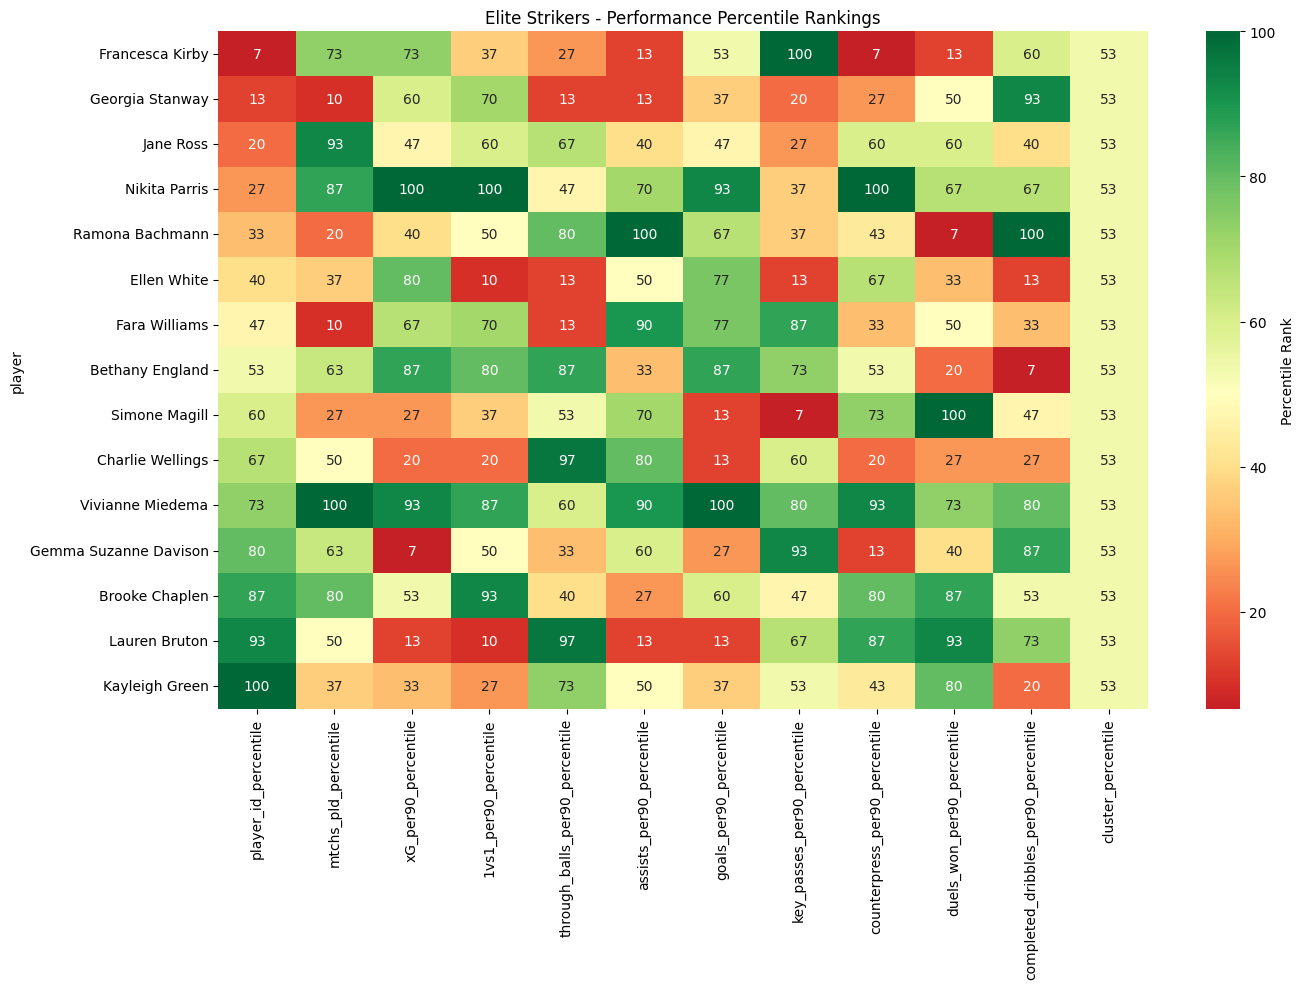

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap of percentiles
plt.figure(figsize=(14, 10))
heatmap_data = elite_strikers.set_index('player')[percentile_cols]

sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', center=50, 
            fmt='.0f', cbar_kws={'label': 'Percentile Rank'})
plt.title('Elite Strikers - Performance Percentile Rankings')
plt.tight_layout()
plt.show()

In [91]:
# show top performers in each category
print("Top Performers in Each Category (within Elite Strikers):")
print("="*60)

metrics_display = {
    'xG_per90': 'Expected Goals',
    'goals_per90': 'Goals Scored', 
    'assists_per90': 'Assists',
    'key_passes_per90': 'Key Passes',
    'completed_dribbles_per90': 'Dribbles'
}

for metric, display_name in metrics_display.items():
    top_3 = elite_strikers.nlargest(3, metric)[['player', 'team', metric]]
    print(f"\n{display_name}:")
    for idx, player in top_3.iterrows():
        print(f"  {player['player']:25} ({player['team']:15}) - {player[metric]:.2f}")

Top Performers in Each Category (within Elite Strikers):

Expected Goals:
  Nikita Parris             (Manchester City WFC) - 0.95
  Vivianne Miedema          (Arsenal WFC    ) - 0.88
  Bethany England           (Chelsea FCW    ) - 0.62

Goals Scored:
  Vivianne Miedema          (Arsenal WFC    ) - 1.05
  Nikita Parris             (Manchester City WFC) - 0.93
  Bethany England           (Chelsea FCW    ) - 0.90

Assists:
  Ramona Bachmann           (Chelsea FCW    ) - 0.60
  Fara Williams             (Reading WFC    ) - 0.50
  Vivianne Miedema          (Arsenal WFC    ) - 0.50

Key Passes:
  Francesca Kirby           (Chelsea FCW    ) - 1.75
  Gemma Suzanne Davison     (Reading WFC    ) - 1.70
  Fara Williams             (Reading WFC    ) - 1.50

Dribbles:
  Ramona Bachmann           (Chelsea FCW    ) - 3.00
  Georgia Stanway           (Manchester City WFC) - 2.75
  Gemma Suzanne Davison     (Reading WFC    ) - 2.00
